<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/3_populations_and_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title importing libraries
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import combinations
from scipy.special import comb
from scipy.stats import norm

#The case of a small population for which it is possible to enumerate all samples with defined size

array([[<Axes: title={'center': 'productivity'}>]], dtype=object)

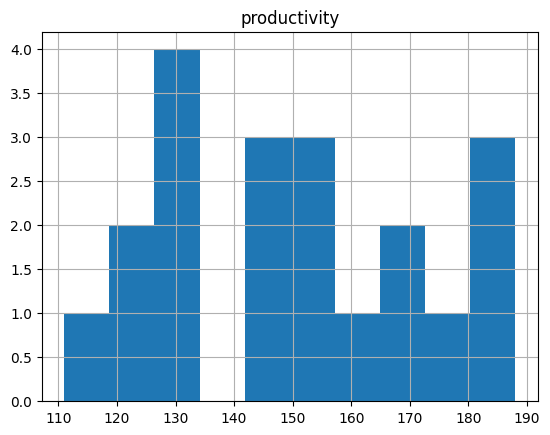

In [58]:
#@title forming population (with some small size = 20)
population_size = 20  # for example apple trees
random.seed(12345)

dataset = [{"tree_id": i,
            "productivity": random.randrange(110, 190),
            #"productivity": random.gauss(mu=150, sigma=10),
            }
           for i in range(population_size)]
df = pd.DataFrame(dataset).set_index('tree_id')
df.hist()

In [59]:
#@title calculating number of all samples with sample_size = 10 (number of combinations)
sample_size = 10
total_num_of_samples = comb(population_size, sample_size)
print("Number of different combinations: ", total_num_of_samples)

Number of different combinations:  184756.0


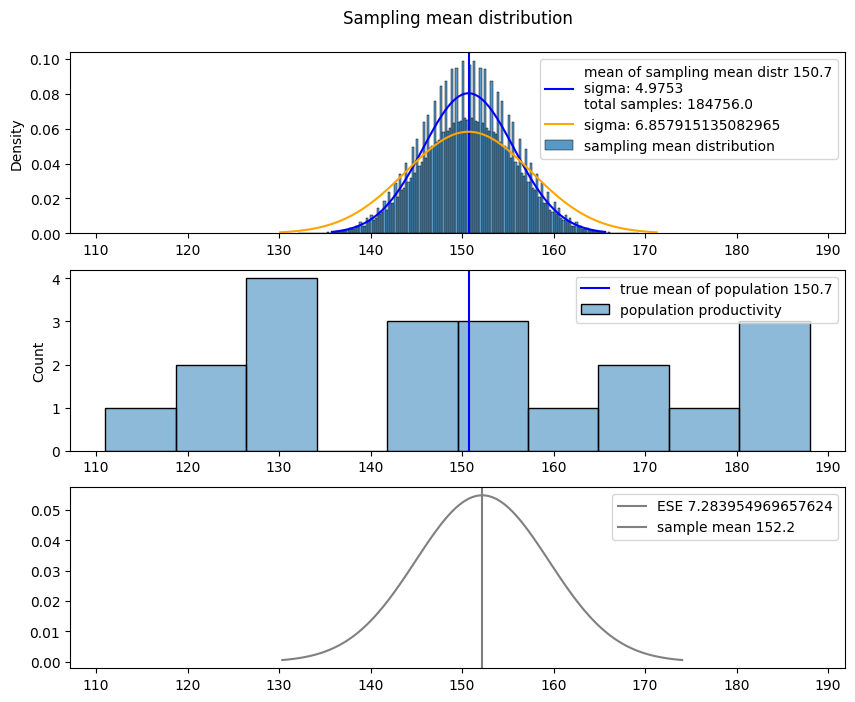

In [60]:
#@title forming all samples and calculating sampling mean distribution
samples_means = []
for i in combinations(list(range(population_size)), sample_size):
    samples_means.append(df[df.index.isin(i)].productivity.mean())

samples_means = pd.Series(samples_means, name="samples_means")


# plotting
fix, ax = plt.subplots(3, figsize=(10,8), height_ratios=[1, 1, 1])
sns.histplot(data=samples_means, stat='density', ax=ax[0], label="sampling mean distribution")

# plotting sampling mean distribution
samples_mean = samples_means.mean()
samples_sigma = np.sqrt(np.var(samples_means))  # sigma(population) / sqrt(sample_size)
x = np.linspace(samples_mean-3*samples_sigma, samples_mean+3*samples_sigma, 100)
distr = norm(samples_mean, samples_sigma)
ax[0].plot(x, distr.pdf(x), color='blue')
ax[0].axvline(x=samples_mean, color='blue',
              label = f"mean of sampling mean distr {samples_mean}\n"
                      f"sigma: {np.round(samples_sigma, 4)}\n"
                      f"total samples: {total_num_of_samples}")

standard_error = np.sqrt(np.var(df.productivity))/np.sqrt(sample_size)
x = np.linspace(samples_mean-3*standard_error, samples_mean+3*standard_error, 100)
distr = norm(samples_mean, standard_error)
ax[0].plot(x, distr.pdf(x), color='orange', label=f"sigma: {standard_error}")
ax[0].set_xlabel("")
ax[0].legend()

# plotting population priductivity and true mean of population
sns.histplot(df, bins=10, ax=ax[1], label="population productivity")
ax[1].axvline(x=df.productivity.mean(), color='blue', label = f"true mean of population {df.productivity.mean()}")
ax[0].sharex(ax[1])
ax[1].legend()

# plotting sample mean and ESE
just_one_sample = df['productivity'].sample(n=sample_size, random_state=13)
just_one_sample_mean = just_one_sample.mean()
just_one_sample_std_dev = np.sqrt(np.var(just_one_sample))/np.sqrt(sample_size)  # estimated standard error

x = np.linspace(just_one_sample_mean-3*just_one_sample_std_dev, just_one_sample_mean+3*just_one_sample_std_dev, 100)
distr = norm(just_one_sample_mean, just_one_sample_std_dev)
ax[2].plot(x, distr.pdf(x), color='gray', label=f"ESE {just_one_sample_std_dev}")
ax[2].axvline(x=just_one_sample_mean, color='gray', label = f"sample mean {just_one_sample_mean}")
ax[2].sharex(ax[1])
ax[2].legend()

ax[0].set_title("Sampling mean distribution\n")
plt.show()

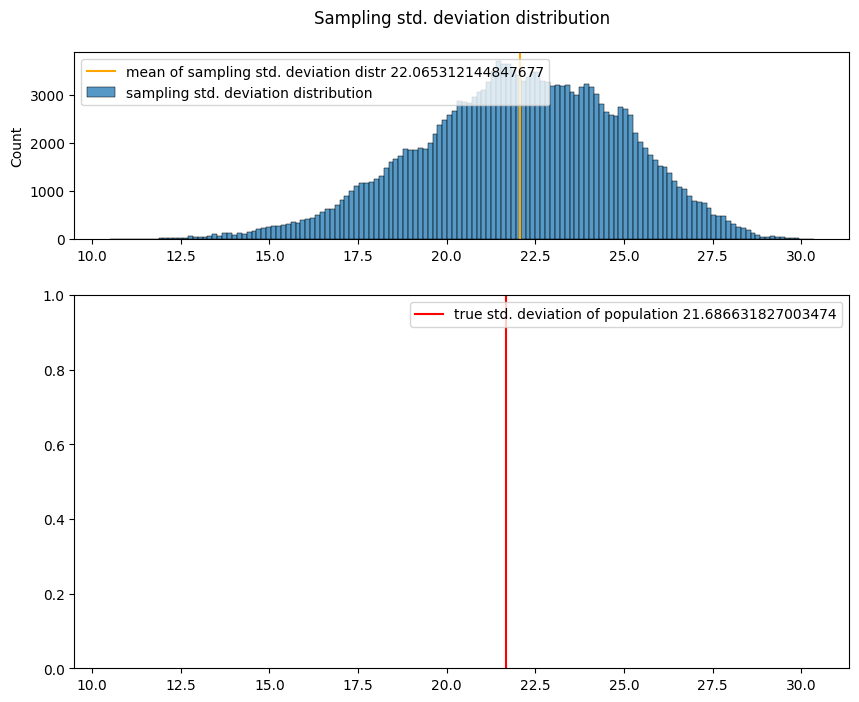

In [61]:
#@title forming all samples and calculating sampling standard deviation distribution
samples_stds = []
for i in combinations(list(range(population_size)), sample_size):
    samples_stds.append(
        np.sqrt(
            np.var(df[df.index.isin(i)].productivity, ddof=1)
        )
    )  # Bessel's correction reduces the bias from the sample standard deviation s by replacing n with n — 1
    # It is impossible to find out the true standard deviation from a sample, we can only estimate

samples_stds = pd.Series(samples_stds, name="samples_variance")

#plotting
fix, ax = plt.subplots(2, figsize=(10,8), height_ratios=[1, 2])

sns.histplot(data=samples_stds, ax=ax[0], label="sampling std. deviation distribution")
ax[0].axvline(x=samples_stds.mean(), color='orange', label = f"mean of sampling std. deviation distr {samples_stds.mean()}")
ax[0].set_xlabel("")
ax[0].legend()


ax[1].axvline(x=np.sqrt(np.var(df.productivity)), color='red', label = f"true std. deviation of population {np.sqrt(np.var(df.productivity))}")
ax[0].sharex(ax[1])
ax[1].legend()

ax[0].set_title("Sampling std. deviation distribution\n")
plt.show()

#The case of a large enough but accessible population

In [ ]:
#@title forming population (with some small size = 5000), population is accessible
population_size = 5000  # for example apple trees
random.seed(12345)

dataset = [{"tree_id": i,
            "productivity": random.randrange(110, 190),
            #"productivity": random.gauss(mu=150, sigma=10),
            }
           for i in range(population_size)]
df = pd.DataFrame(dataset).set_index('tree_id')
df.hist()

In [74]:
#@title calculating number of all samples with sample_size = 300 (number of combinations)
sample_size = 300
total_num_of_samples = comb(population_size, sample_size)
print("Number of different combinations: ", total_num_of_samples)

Number of different combinations:  inf


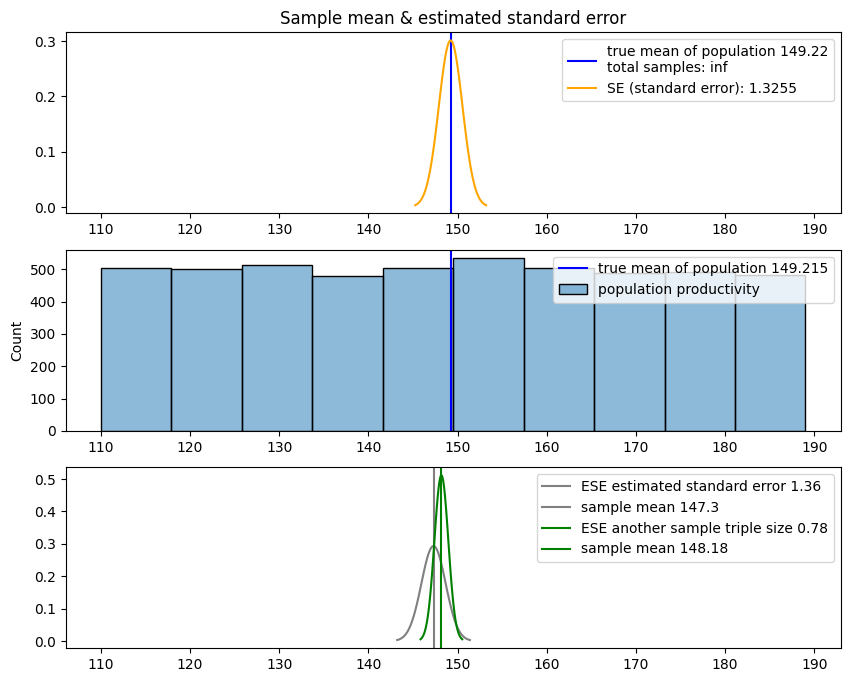

In [92]:
#@title forming all samples and calculating sampling mean distribution

# plotting
fix, ax = plt.subplots(3, figsize=(10,8), height_ratios=[1, 1, 1])

population_mean = np.round(df.productivity.mean(), 2)
standard_error = np.sqrt(np.var(df.productivity))/np.sqrt(sample_size)
x = np.linspace(population_mean-3*standard_error, population_mean+3*standard_error, 100)
distr = norm(population_mean, standard_error)

# plotting standard error
ax[0].axvline(x=population_mean, color='blue',
              label = f"true mean of population {population_mean}\n"
                      f"total samples: {total_num_of_samples}")

ax[0].plot(x, distr.pdf(x), color='orange', label=f"SE (standard error): {np.round(standard_error, 4)}" )
ax[0].set_xlabel("")
ax[0].legend()

# plotting population priductivity and true mean of population
sns.histplot(df, bins=10, ax=ax[1], label="population productivity")
ax[1].axvline(x=df.productivity.mean(), color='blue', label = f"true mean of population {df.productivity.mean()}")
ax[0].sharex(ax[1])
ax[1].legend()

# plotting sample mean and ESE
just_one_sample = df['productivity'].sample(n=sample_size, random_state=13)
just_one_sample_mean = np.round(just_one_sample.mean(), 2)
just_one_sample_std_dev = np.round(
    np.sqrt(np.var(just_one_sample))/np.sqrt(sample_size),  # estimated standard error
    2)

x = np.linspace(just_one_sample_mean-3*just_one_sample_std_dev, just_one_sample_mean+3*just_one_sample_std_dev, 100)
distr = norm(just_one_sample_mean, just_one_sample_std_dev)
ax[2].plot(x, distr.pdf(x), color='gray', label=f"ESE estimated standard error {just_one_sample_std_dev}")
ax[2].axvline(x=just_one_sample_mean, color='gray', label = f"sample mean {just_one_sample_mean}")



just_one_sample = df['productivity'].sample(n=sample_size*3, random_state=32)
just_one_sample_mean = np.round(just_one_sample.mean(), 2)
just_one_sample_std_dev = np.round(
    np.sqrt(np.var(just_one_sample))/np.sqrt(sample_size*3),  # estimated standard error
    2)

x = np.linspace(just_one_sample_mean-3*just_one_sample_std_dev, just_one_sample_mean+3*just_one_sample_std_dev, 100)
distr = norm(just_one_sample_mean, just_one_sample_std_dev)
ax[2].plot(x, distr.pdf(x), color='green', label=f"ESE another sample triple size {just_one_sample_std_dev}")
ax[2].axvline(x=just_one_sample_mean, color='green', label = f"sample mean {just_one_sample_mean}")


ax[2].sharex(ax[1])
ax[2].legend()

ax[0].set_title("Sample mean & estimated standard error")
plt.show()